# City Salary Data Analyis
One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

# Exploration Ideas

* How have salaries changed over time between different groups of people?
* How are base pay, overtime pay, and benefits allocated between   different groups?
* Is there any evidence of pay discrimination based on gender in this dataset?
* How is budget allocated based on different groups and responsibilities?

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Read the data

In [2]:
salaries = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\San_Fransisco_salary_analysis\\data\\Salaries.csv")
salaries.head()

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Basic data study

In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


#### What are your observations about the basic statistics of data?

## What columns do you think do not add value to our analysis? Drop those columns.

In [5]:
salaries.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109900
OvertimePay          66555
OtherPay             84968
Benefits             99635
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

In [6]:
salaries.shape

(148654, 13)

In [7]:
salaries.Status.value_counts(dropna = False, normalize=True)
salaries.Status.value_counts(dropna=False, normalize=True)

NaN    0.743572
FT     0.150242
PT     0.106186
Name: Status, dtype: float64

In [8]:
salaries.value_counts()

Series([], dtype: int64)

In [9]:
salaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [10]:
salaries.drop(columns=['Id','Notes','Agency','Status'], inplace=True)

In [11]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011


In [12]:
salaries.Benefits.value_counts(dropna=False, normalize=True)

NaN         0.243243
0.0         0.007084
0.00        0.004581
7959.18     0.002341
4659.36     0.000720
              ...   
826.6       0.000007
32109.27    0.000007
14444.77    0.000007
5332.54     0.000007
56736.67    0.000007
Name: Benefits, Length: 99636, dtype: float64

In [13]:
salaries.shape

(148654, 9)

## Check for missing values in the data, what is the strategy you will apply to deal with missing values?

In [14]:
salaries.isnull().sum().divide(salaries.shape[0]).multiply(100)

EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.406985
OvertimePay          0.000000
OtherPay             0.000000
Benefits            24.324270
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
dtype: float64

In [15]:
salaries.Benefits.fillna(0,inplace=True)

In [16]:
salaries.isnull().sum()

EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
dtype: int64

In [17]:
salaries.dropna(inplace=True)
salaries.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

## Convert the object values of all the types of pays to numeric, use to_numeric method of pandas to convert. Is it as straightforward or there is some descripency? if yes, how will you overcome it?

In [18]:
salaries.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [19]:
salaries.BasePay.astype('Float64')

ValueError: could not convert string to float: 'Not Provided'

In [ ]:
salaries.loc[salaries.BasePay=='Not Provided'].index

In [ ]:
salaries.BasePay.drop(salaries.loc[salaries.BasePay=='Not Provided'].index).astype('Float64')

In [ ]:
pd.to_numeric(salaries.BasePay, errors='coerce')

In [ ]:
salaries.BasePay.isnull

In [ ]:
salaries.loc[salaries.BasePay=='Not Provided'].index

In [20]:
salaries.drop(salaries.loc[salaries.BasePay=='Not Provided'].index, inplace=True)

In [21]:
salaries.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [22]:
numeric_col= ['BasePay','OvertimePay','OtherPay','Benefits']

In [23]:
salaries.loc[:,numeric_col] = salaries.loc[:,numeric_col].astype('Float64')

In [24]:
salaries.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

## Find the job titles of the 10 highest median base pay

Base Pay -> The most basic sum of money or hourly rate paid to an employee of a business in compensation for their work efforts or time spent on the job

In [25]:
xyz= salaries.groupby('JobTitle')['BasePay'].median()
xyz

JobTitle
ACCOUNT CLERK                                     49777.780
ACCOUNTANT                                        60076.240
ACCOUNTANT INTERN                                 16806.755
ACPO,JuvP, Juv Prob (SFERS)                       62290.780
ACUPUNCTURIST                                     66374.400
                                                    ...    
X-RAY LABORATORY AIDE                             54066.080
X-Ray Laboratory Aide                             55251.635
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910
Youth Comm Advisor                                42425.650
ZOO CURATOR                                       43148.000
Name: BasePay, Length: 2154, dtype: float64

In [26]:
salaries.groupby('JobTitle').median()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,,,,,,,
ACCOUNT CLERK,49777.780,0.000,0.000,0.00,49777.820,49777.820,2011.0
ACCOUNTANT,60076.240,0.000,0.000,0.00,60076.240,60076.240,2011.0
ACCOUNTANT INTERN,16806.755,0.000,0.000,0.00,17658.505,17658.505,2011.0
"ACPO,JuvP, Juv Prob (SFERS)",62290.780,0.000,0.000,17975.59,62290.780,80266.370,2014.0
ACUPUNCTURIST,66374.400,0.000,1220.000,0.00,67594.400,67594.400,2011.0
...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,54066.080,2471.100,833.150,0.00,60333.125,60333.125,2011.0
X-Ray Laboratory Aide,55251.635,941.215,801.895,26107.20,60047.290,85551.190,2013.0
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910,0.000,1022.960,0.00,53632.870,53632.870,2011.0


In [27]:
salaries.groupby('JobTitle')['BasePay'].median().nlargest(20)

JobTitle
Chief of Police                           307450.040
Chief, Fire Department                    302068.000
Gen Mgr, Public Trnsp Dept                294000.180
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000
Mayor                                     281537.170
Dep Dir for Investments, Ret              276153.765
Dept Head V                               270616.270
Adm, SFGH Medical Center                  268946.020
Controller                                267914.000
EXECUTIVE CONTRACT EMPLOYEE               264452.520
Deputy Chief 3                            263408.550
Dep Chf of Dept (Fire Dept)               260728.000
ASSISTANT MEDICAL EXAMINER                257510.440
Chief Investment Officer                  257340.000
Administrator, DPH                        256730.060
DEPUTY DIRECTOR OF INVESTMENTS            256576.960
CHIEF OF POLICE                           256470.410
Port Director                             250850.010
DEPARTMENT HEAD V                    

In [28]:
salaries.groupby('JobTitle').BasePay.median().nlargest(20)

JobTitle
Chief of Police                           307450.040
Chief, Fire Department                    302068.000
Gen Mgr, Public Trnsp Dept                294000.180
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000
Mayor                                     281537.170
Dep Dir for Investments, Ret              276153.765
Dept Head V                               270616.270
Adm, SFGH Medical Center                  268946.020
Controller                                267914.000
EXECUTIVE CONTRACT EMPLOYEE               264452.520
Deputy Chief 3                            263408.550
Dep Chf of Dept (Fire Dept)               260728.000
ASSISTANT MEDICAL EXAMINER                257510.440
Chief Investment Officer                  257340.000
Administrator, DPH                        256730.060
DEPUTY DIRECTOR OF INVESTMENTS            256576.960
CHIEF OF POLICE                           256470.410
Port Director                             250850.010
DEPARTMENT HEAD V                    

## Find the job titles of the 10 highest median Overtime Pay


Overtime Pay -> Additional financial compensation for any hours worked by nonexempt staff over the amount of forty hours per week.

In [29]:
salaries.groupby('JobTitle')['OvertimePay'].median().nlargest(10)

JobTitle
Wire Rope Cable Maint Sprv                      81313.490
WIRE ROPE CABLE MAINTENANCE SUPERVISOR          66164.730
Trnst Power Line Wrk Sprv 2                     66006.100
Battalion Chief, Fire Suppress                  49833.050
Incident Support Specialist                     46669.885
SENIOR POWER GENERATION TECHNICIAN              46504.350
ASSISTANT INSPECTOR (POLICE DEPARTMENT)         45679.840
MECHANICAL SHOP AND EQUIPMENT SUPERINTENDENT    44930.700
Transit Power Line Sprv1                        44422.370
Asst Chf of Dept (Fire Dept)                    43389.970
Name: OvertimePay, dtype: float64

<AxesSubplot:xlabel='JobTitle'>

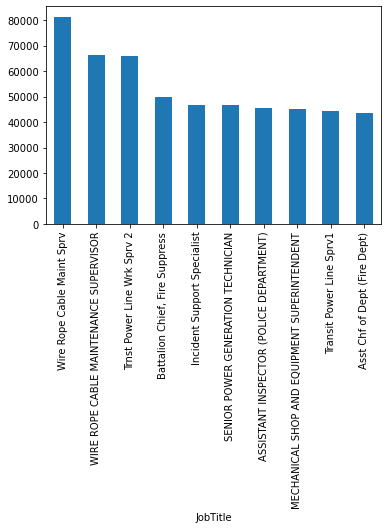

In [30]:
salaries.groupby('JobTitle')['OvertimePay'].median().nlargest(10).plot(kind='bar')

In [31]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


## Plot the sectors which have provided the maximum  number of employment

In [32]:
salaries.loc[1,:]

EmployeeName                           GARY JIMENEZ
JobTitle            CAPTAIN III (POLICE DEPARTMENT)
BasePay                                      155966
OvertimePay                                  245132
OtherPay                                     137811
Benefits                                          0
TotalPay                                     538909
TotalPayBenefits                             538909
Year                                           2011
Name: 1, dtype: object

<AxesSubplot:>

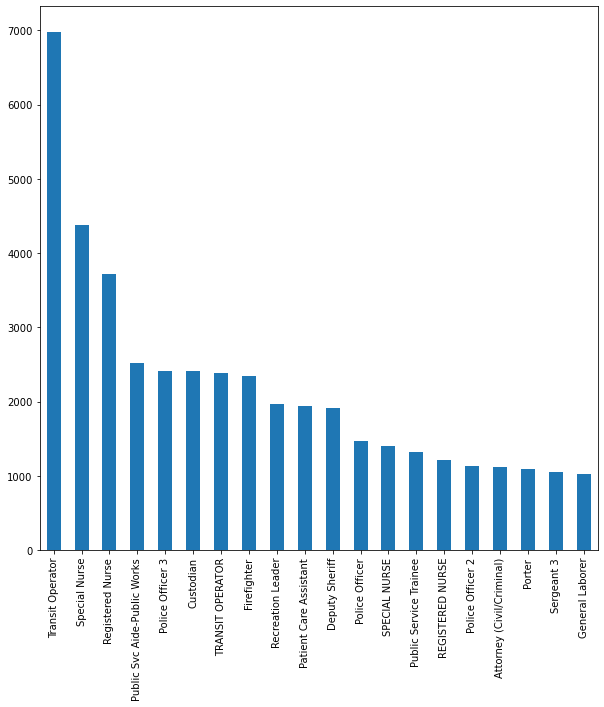

In [33]:
salaries.JobTitle.value_counts().nlargest(20).plot(kind='bar', figsize=(10,10))

## Plot the top 10 Job titles with highest mean TotalPayBenefits

<AxesSubplot:xlabel='JobTitle'>

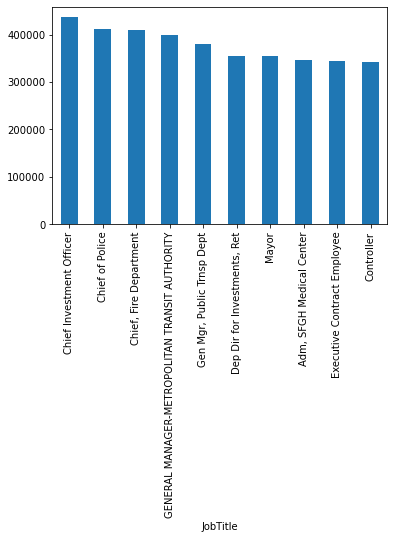

In [34]:
salaries.groupby('JobTitle')['TotalPayBenefits'].mean().nlargest(10).plot(kind='bar')

## Find the highest paid employees for the year 2012, 2013 and 2014



In [42]:
salaries.groupby('Year').agg({'TotalPayBenefits':'max'})

,TotalPayBenefits
Year,
2011,567595.43
2012,407274.78
2013,425815.28
2014,510732.68


In [45]:
salaries.iloc[salaries.groupby('Year').TotalPayBenefits.idxmax()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
72925,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013
111136,Michael G Mceachern,Inspector 3,137982.08,48712.86,20356.21,43400.74,207051.15,250451.89,2014


In [47]:
salaries.groupby('Year').TotalPayBenefits.max()

Year
2011    567595.43
2012    407274.78
2013    425815.28
2014    510732.68
Name: TotalPayBenefits, dtype: float64

## What questions do you want the answer for looking at the data?
